In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using XGB+DT - Stacking


In [5]:

# print(f"Stacking Test Accuracy: {accuracy_stacking:.2f}")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train_encoded)

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)

# Stacking
base_models = [
    ('decision_tree', decision_tree),
    ('xgb_classifier', xgb_classifier)
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())
stacking_model.fit(X_train, y_train_encoded)

# Evaluate on Test Set
y_pred_dt = decision_tree.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_stacking = stacking_model.predict(X_test)

accuracy_dt = le.inverse_transform(y_pred_dt)
accuracy_xgb = le.inverse_transform(y_pred_xgb)
accuracy_stacking = le.inverse_transform(y_pred_stacking)

# Timing Comparison
start_time = time.time()
decision_tree.fit(X_train, y_train_encoded)
end_time = time.time()
training_time_dt = end_time - start_time

start_time = time.time()
xgb_classifier.fit(X_train, y_train_encoded)
end_time = time.time()
training_time_xgb = end_time - start_time

start_time = time.time()
stacking_model.fit(X_train, y_train_encoded)
end_time = time.time()
training_time_stacking = end_time - start_time

print(f"Decision Tree Training time: {training_time_dt:.2f} seconds")
print(f"XGBoost Training time: {training_time_xgb:.2f} seconds")
print(f"Stacking Training time: {training_time_stacking:.2f} seconds")





Decision Tree Training time: 0.02 seconds
XGBoost Training time: 0.15 seconds
Stacking Training time: 1.01 seconds


## Using Evaluation Metrics

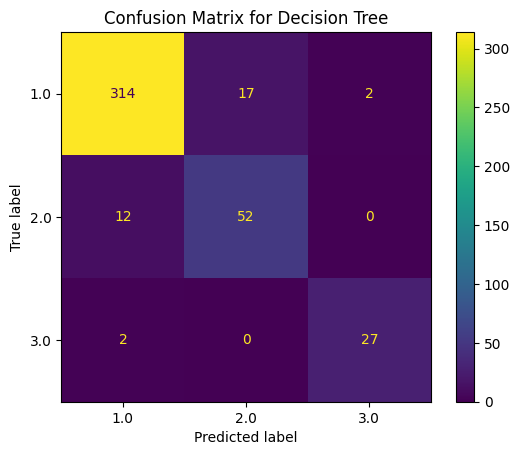

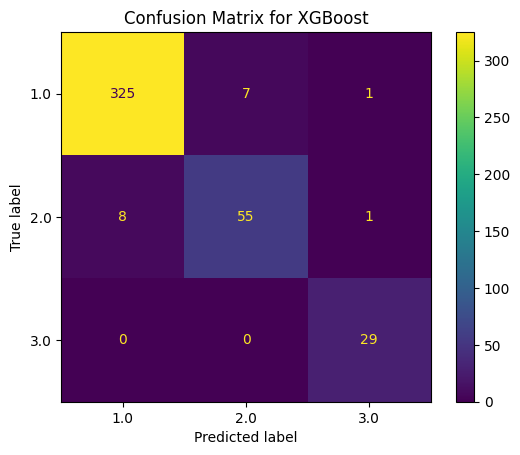

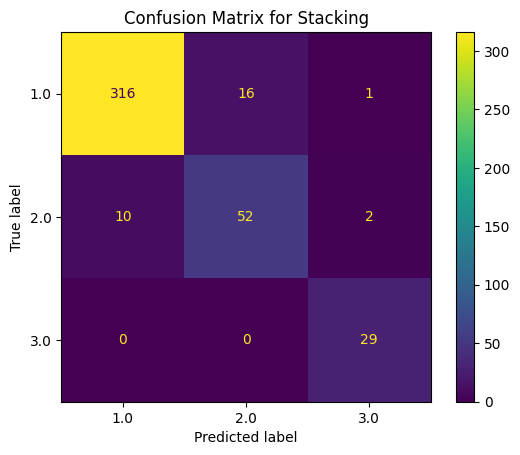


Metrics for Decision Tree:
Accuracy = 92.25%
Precision = 0.88
Recall = 0.90
F1-score = 0.89

Metrics for XGBoost:
Accuracy = 96.01%
Precision = 0.93
Recall = 0.95
F1-score = 0.94

Metrics for Stacking:
Accuracy = 93.19%
Precision = 0.88
Recall = 0.92
F1-score = 0.90


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder


# Display Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, accuracy_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=np.unique(y_train))
disp_dt.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Display Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, accuracy_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=np.unique(y_train))
disp_xgb.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Display Confusion Matrix for Stacking
conf_matrix_stacking = confusion_matrix(y_test, accuracy_stacking)
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking, display_labels=np.unique(y_train))
disp_stacking.plot()
plt.title("Confusion Matrix for Stacking")
plt.show()

# Other Metrics
print("\nMetrics for Decision Tree:")
print("Accuracy = {:.2f}%".format(accuracy_score(y_test, accuracy_dt) * 100))
print("Precision = {:.2f}".format(precision_score(y_test, accuracy_dt, average='macro')))
print("Recall = {:.2f}".format(recall_score(y_test, accuracy_dt, average='macro')))
print("F1-score = {:.2f}".format(f1_score(y_test, accuracy_dt, average='macro')))

print("\nMetrics for XGBoost:")
print("Accuracy = {:.2f}%".format(accuracy_score(y_test, accuracy_xgb) * 100))
print("Precision = {:.2f}".format(precision_score(y_test, accuracy_xgb, average='macro')))
print("Recall = {:.2f}".format(recall_score(y_test, accuracy_xgb, average='macro')))
print("F1-score = {:.2f}".format(f1_score(y_test, accuracy_xgb, average='macro')))

print("\nMetrics for Stacking:")
print("Accuracy = {:.2f}%".format(accuracy_score(y_test, accuracy_stacking) * 100))
print("Precision = {:.2f}".format(precision_score(y_test, accuracy_stacking, average='macro')))
print("Recall = {:.2f}".format(recall_score(y_test, accuracy_stacking, average='macro')))
print("F1-score = {:.2f}".format(f1_score(y_test, accuracy_stacking, average='macro')))


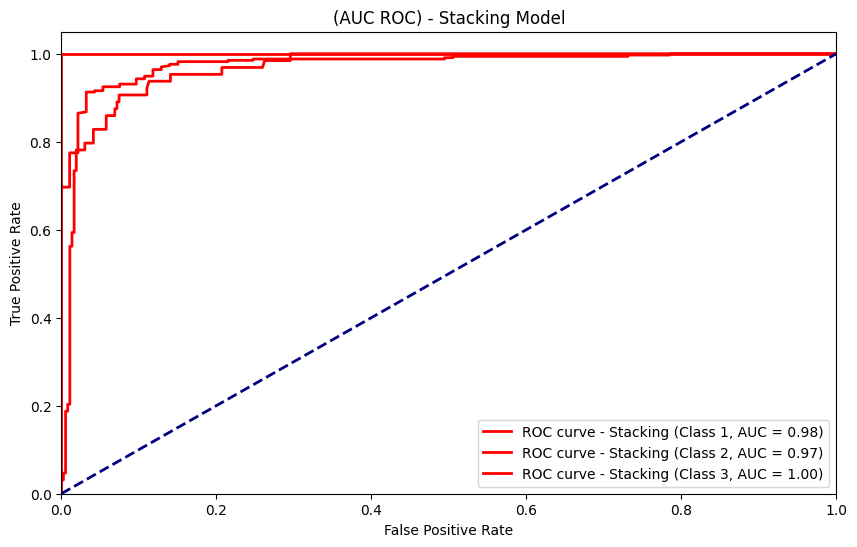

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train_encoded)

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)

# Stacking
base_models = [
    ('decision_tree', decision_tree),
    ('xgb_classifier', xgb_classifier)
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())
stacking_model.fit(X_train, y_train_encoded)

y_scores_stacking = stacking_model.predict_proba(X_test)

n_classes = len(np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, color='r', lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Stacking Model')
plt.legend(loc="lower right")
plt.show()


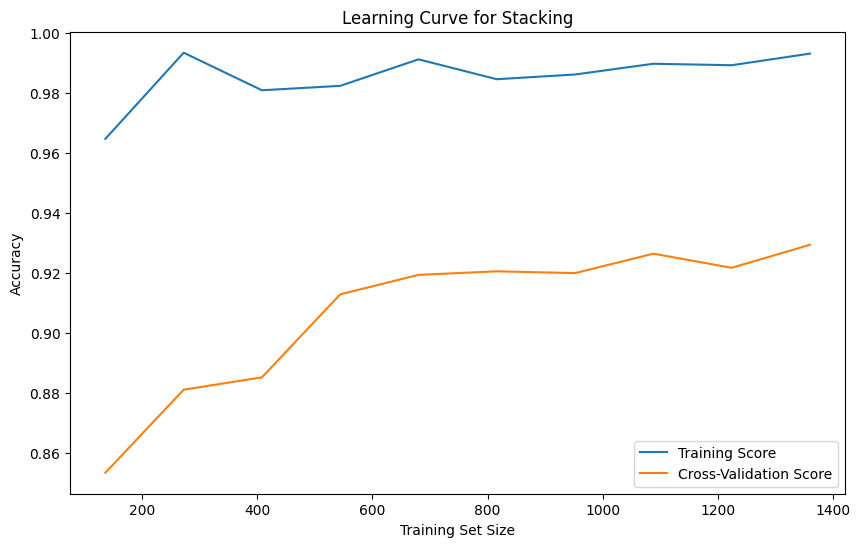

In [8]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



models = {
    'Stacking': y_pred_stacking
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()

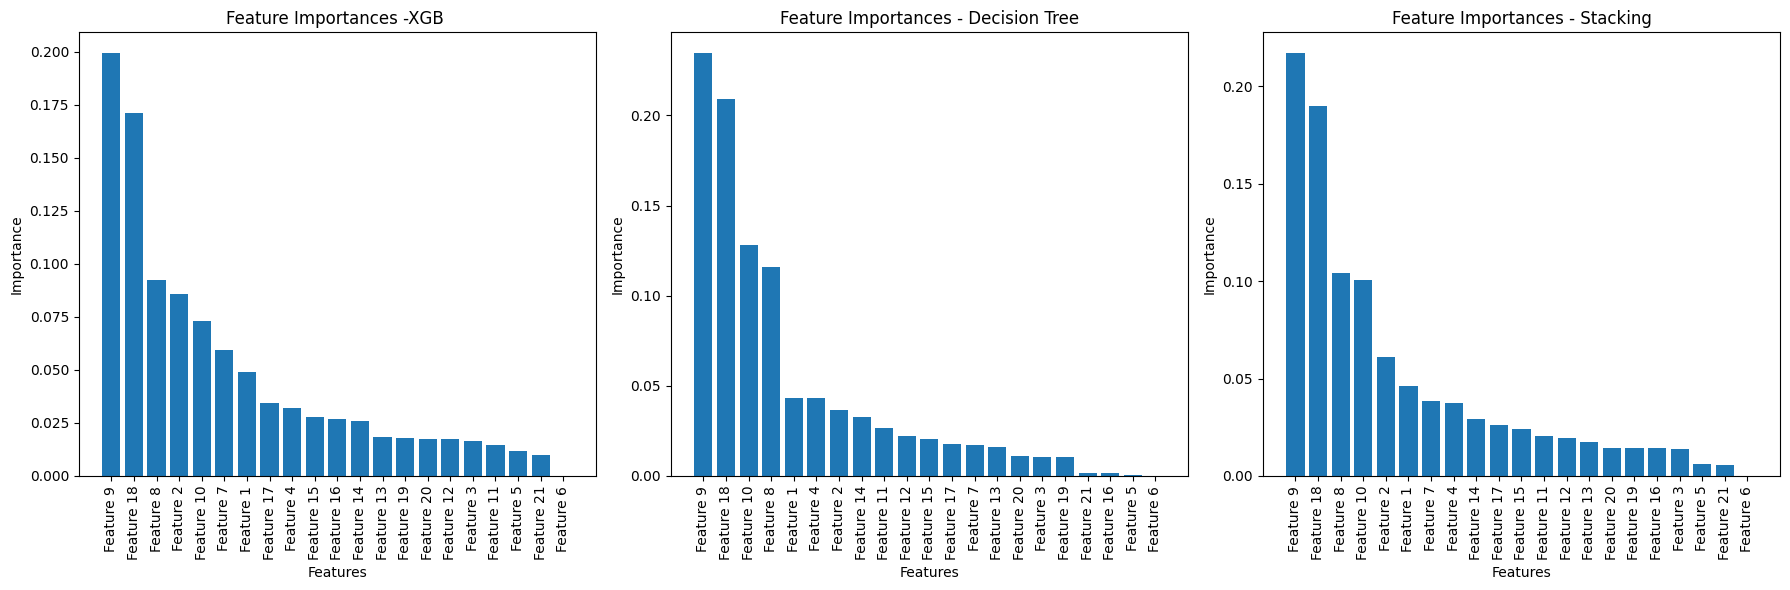

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

feature_importances_dt = decision_tree.feature_importances_

# Feature Importance for XGBoost
feature_importances_xgb = xgb_classifier.feature_importances_

# Stacking
base_models = [
    ('decision_tree', decision_tree),
    ('xgb_classifier', xgb_classifier)
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())
stacking_model.fit(X_train, y_train)
feature_importances_stacking = np.mean([estimator.feature_importances_ for estimator in stacking_model.estimators_], axis=0)

# Plotting
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_xgb))]
sorted_idx_rf = feature_importances_xgb.argsort()[::-1]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.bar(range(len(feature_importances_xgb)), feature_importances_xgb[sorted_idx_rf], align="center")
plt.xticks(range(len(feature_importances_xgb)), [feature_names[i] for i in sorted_idx_rf], rotation='vertical')
plt.title("Feature Importances -XGB ")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_dt))]
sorted_idx_dt = feature_importances_dt.argsort()[::-1]

plt.subplot(1, 3, 2)
plt.bar(range(len(feature_importances_dt)), feature_importances_dt[sorted_idx_dt], align="center")
plt.xticks(range(len(feature_importances_dt)), [feature_names[i] for i in sorted_idx_dt], rotation='vertical')
plt.title("Feature Importances - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_stacking))]
sorted_idx_stacking = feature_importances_stacking.argsort()[::-1]

plt.subplot(1, 3, 3)
plt.bar(range(len(feature_importances_stacking)), feature_importances_stacking[sorted_idx_stacking], align="center")
plt.xticks(range(len(feature_importances_stacking)), [feature_names[i] for i in sorted_idx_stacking], rotation='vertical')
plt.title("Feature Importances - Stacking")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()


In [10]:
top_k_features_indices = sorted_idx_stacking[:9]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 8 17  7  9  1  0  6  3 13]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


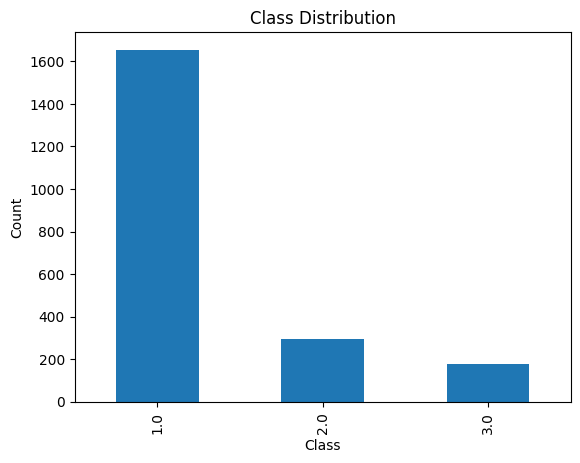

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]

Feature names during training: Index(['mean_value_of_short_term_variability', 'histogram_mean',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'accelerations', 'baseline value', 'prolongued_decelerations',
       'uterine_contractions', 'histogram_max'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')


Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


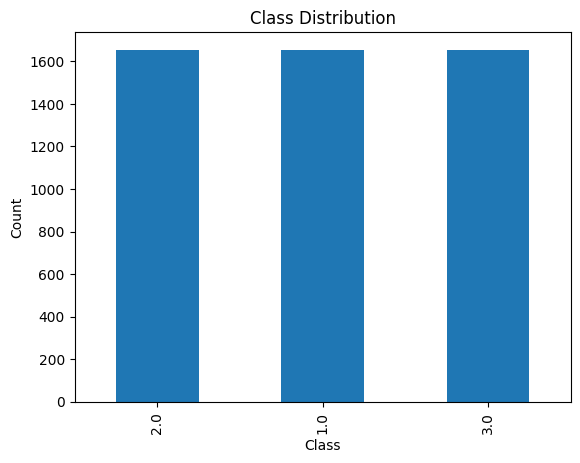

In [13]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using XGB+DT - Stacking

In [14]:

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# Decision Tree
decision_tree_after = DecisionTreeClassifier()
decision_tree_after.fit(X_resampled, y_resampled_encoded)
y_pred_full_dt = decision_tree_after.predict(X_resampled)
y_pred_test_dt = decision_tree_after.predict(X_test_aligned)

le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

xgb_classifier_after = XGBClassifier()
xgb_classifier_after.fit(X_resampled, y_resampled_encoded)

# y_pred_encoded = xgb_classifier_after.predict(X_test)

# y_pred_after = le.inverse_transform(y_pred_encoded)
y_pred_full_xgb = xgb_classifier_after.predict(X_resampled)
y_pred_test_xgb = xgb_classifier_after.predict(X_test_aligned)

# y_pred_full_xgb = xgb_after.predict(X_resampled)
# y_pred_test_xgb = xgb_after.predict(X_test_aligned)

# Stacking
base_models = [
    ('decision_tree', decision_tree_after),
    ('xgb_classifier', xgb_classifier_after)
]

# Using RandomForest as the meta-estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier())
stacking_model.fit(X_resampled, y_resampled_encoded)
y_pred_full_stack = stacking_model.predict(X_resampled)
y_pred_test_stack = stacking_model.predict(X_test_aligned)
y_test_converted = y_test - 1


Holdout Score (Stacking): 0.9657603222557906
k-Fold CV (Stacking): 0.9657612101819087
Stratified k-Fold CV (Stacking): 0.9720029299523396


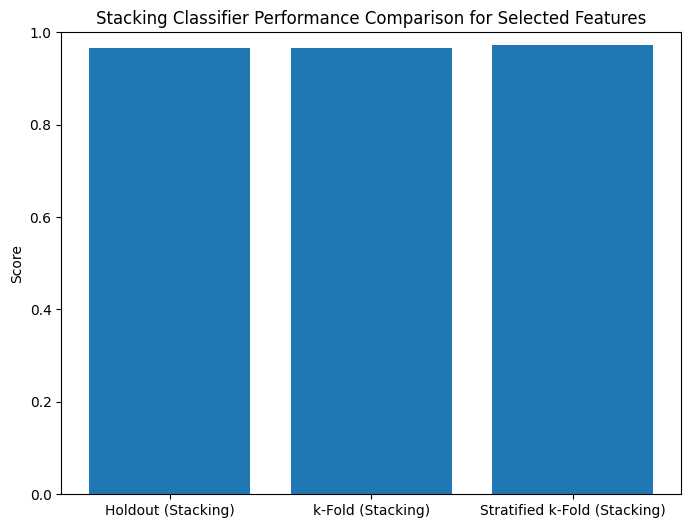

In [15]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt


base_models = [
    ('decision_tree', decision_tree_after),
    ('xgb_classifier', xgb_classifier_after)
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())

cv_scores_holdout_stack = []
cv_scores_kfold_stack = []
cv_scores_stratified_kfold_stack = []

# Holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)
stacking_model.fit(X_train, y_train)
score_holdout = stacking_model.score(X_holdout, y_holdout)
cv_scores_holdout_stack.append(score_holdout)
print(f'Holdout Score (Stacking): {score_holdout}')

# k-Fold
kf_stack = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled_encoded, cv=kf_stack, scoring='accuracy')
cv_scores_kfold_stack.append(scores_kfold_stack.mean())
print(f'k-Fold CV (Stacking): {scores_kfold_stack.mean()}')

# Stratified k-Fold
skf_stack = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled_encoded, cv=skf_stack, scoring='accuracy')
cv_scores_stratified_kfold_stack.append(scores_stratified_kfold_stack.mean())
print(f'Stratified k-Fold CV (Stacking): {scores_stratified_kfold_stack.mean()}')

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Holdout (Stacking)', 'k-Fold (Stacking)', 'Stratified k-Fold (Stacking)'],
        [cv_scores_holdout_stack[0], cv_scores_kfold_stack[0], cv_scores_stratified_kfold_stack[0]])
plt.title(f'Stacking Classifier Performance Comparison for Selected Features')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

<Figure size 800x600 with 0 Axes>

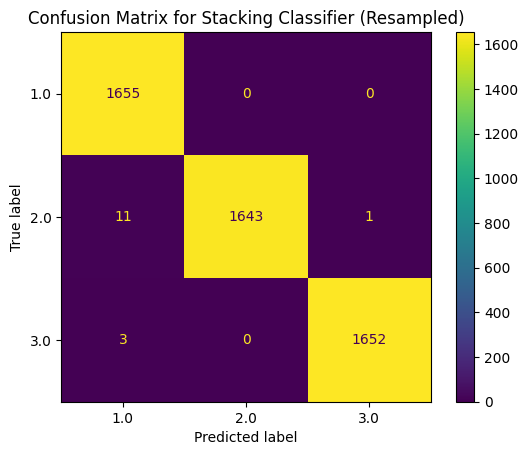

Accuracy (Stacking - Resampled): 99.69788519637463 %
Precision (macro, Stacking - Resampled): 0.9970022609604872
Recall (macro, Stacking - Resampled): 0.9969788519637462
F1-score (macro, Stacking - Resampled): 0.9969801494357146
Classification Report (Stacking - Resampled):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1655
           1       1.00      0.99      1.00      1655
           2       1.00      1.00      1.00      1655

    accuracy                           1.00      4965
   macro avg       1.00      1.00      1.00      4965
weighted avg       1.00      1.00      1.00      4965



<Figure size 800x600 with 0 Axes>

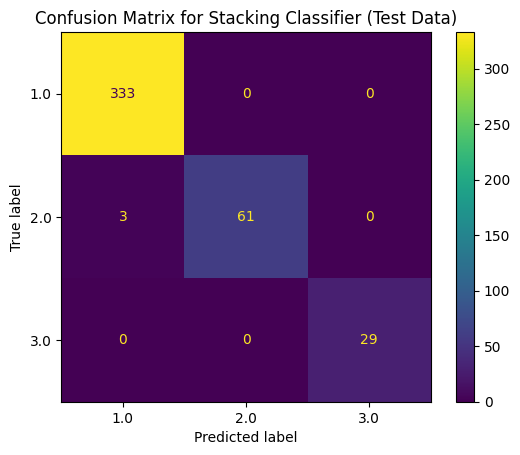

Accuracy (Stacking - Test): 99.29577464788733 %
Precision (macro, Stacking - Test): 0.9970238095238096
Recall (macro, Stacking - Test): 0.984375
F1-score (macro, Stacking - Test): 0.9905052316890881
Classification Report (Stacking - Test):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       333
         1.0       1.00      0.95      0.98        64
         2.0       1.00      1.00      1.00        29

    accuracy                           0.99       426
   macro avg       1.00      0.98      0.99       426
weighted avg       0.99      0.99      0.99       426



In [16]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluation metrics for Stacking Classifier on resampled data
accuracy_stacking_resampled = accuracy_score(y_resampled_encoded, y_pred_full_stack)
precision_stacking_resampled = precision_score(y_resampled_encoded, y_pred_full_stack, average='macro')
recall_stacking_resampled = recall_score(y_resampled_encoded, y_pred_full_stack, average='macro')
f1_stacking_resampled = f1_score(y_resampled_encoded, y_pred_full_stack, average='macro')

conf_matrix_stacking_resampled = confusion_matrix(y_resampled_encoded, y_pred_full_stack)
class_report_stacking_resampled = classification_report(y_resampled_encoded, y_pred_full_stack)

# Plotting Confusion Matrix for Stacking Classifier on resampled data
plt.figure(figsize=(8, 6))
disp_stack_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_resampled, display_labels=np.unique(y))
disp_stack_resampled.plot()
plt.title('Confusion Matrix for Stacking Classifier (Resampled)')
plt.show()

print("Accuracy (Stacking - Resampled):", accuracy_stacking_resampled * 100, "%")
print("Precision (macro, Stacking - Resampled):", precision_stacking_resampled)
print("Recall (macro, Stacking - Resampled):", recall_stacking_resampled)
print("F1-score (macro, Stacking - Resampled):", f1_stacking_resampled)
print("Classification Report (Stacking - Resampled):")
print(class_report_stacking_resampled)

# Evaluation metrics for Stacking Classifier on test data
accuracy_stacking_test = accuracy_score(y_test_converted, y_pred_test_stack)
precision_stacking_test = precision_score(y_test_converted, y_pred_test_stack, average='macro')
recall_stacking_test = recall_score(y_test_converted, y_pred_test_stack, average='macro')
f1_stacking_test = f1_score(y_test_converted, y_pred_test_stack, average='macro')

conf_matrix_stacking_test = confusion_matrix(y_test_converted, y_pred_test_stack)
class_report_stacking_test = classification_report(y_test_converted, y_pred_test_stack)

# Plotting Confusion Matrix for Stacking Classifier on test data
plt.figure(figsize=(8, 6))
disp_stack_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_test, display_labels=np.unique(y))
disp_stack_test.plot()
plt.title('Confusion Matrix for Stacking Classifier (Test Data)')
plt.show()

print("Accuracy (Stacking - Test):", accuracy_stacking_test * 100, "%")
print("Precision (macro, Stacking - Test):", precision_stacking_test)
print("Recall (macro, Stacking - Test):", recall_stacking_test)
print("F1-score (macro, Stacking - Test):", f1_stacking_test)
print("Classification Report (Stacking - Test):")
print(class_report_stacking_test)


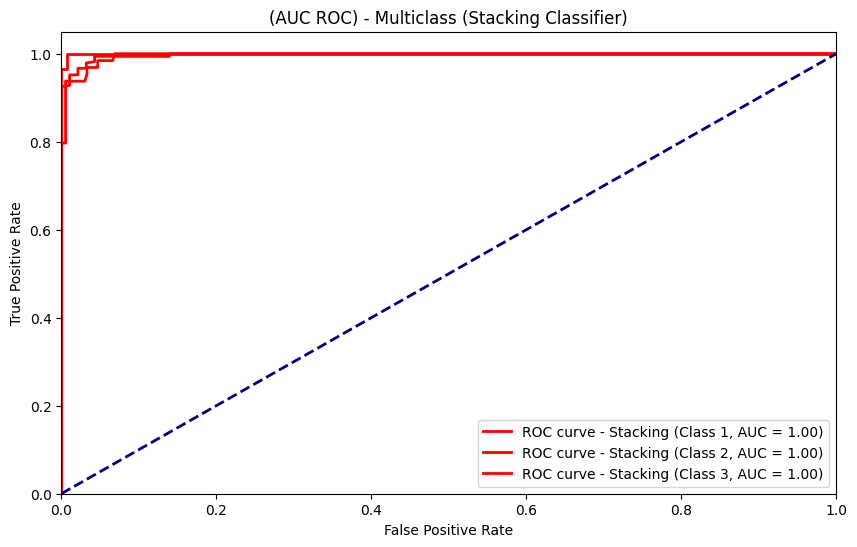

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores_stacking = stacking_model.predict_proba(X_test_aligned)

plt.figure(figsize=(10, 6))

n_classes = len(np.unique(y))

colors = ['b', 'g', 'r']

# Plotting ROC curves for Stacking Classifier
for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, color='r', lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass (Stacking Classifier)')
plt.legend(loc="lower right")
plt.show()


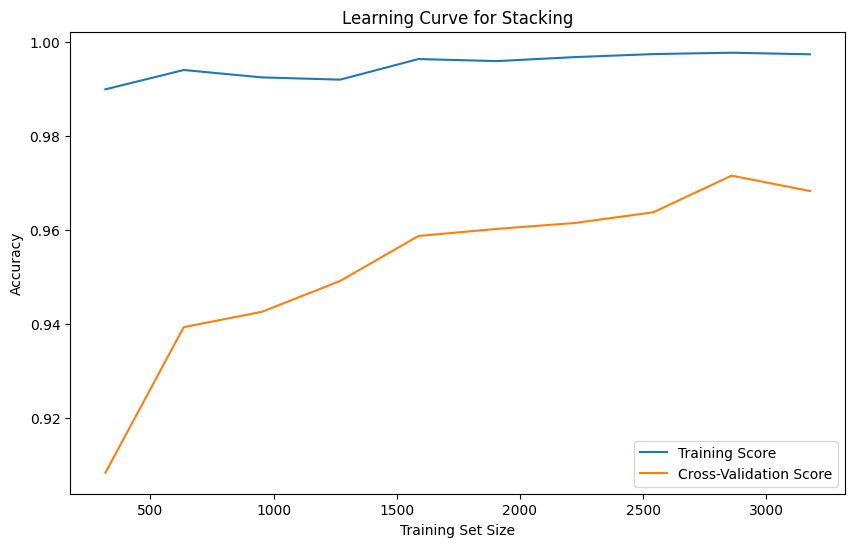

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



models = {
    'Stacking': y_pred_test_stack
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()


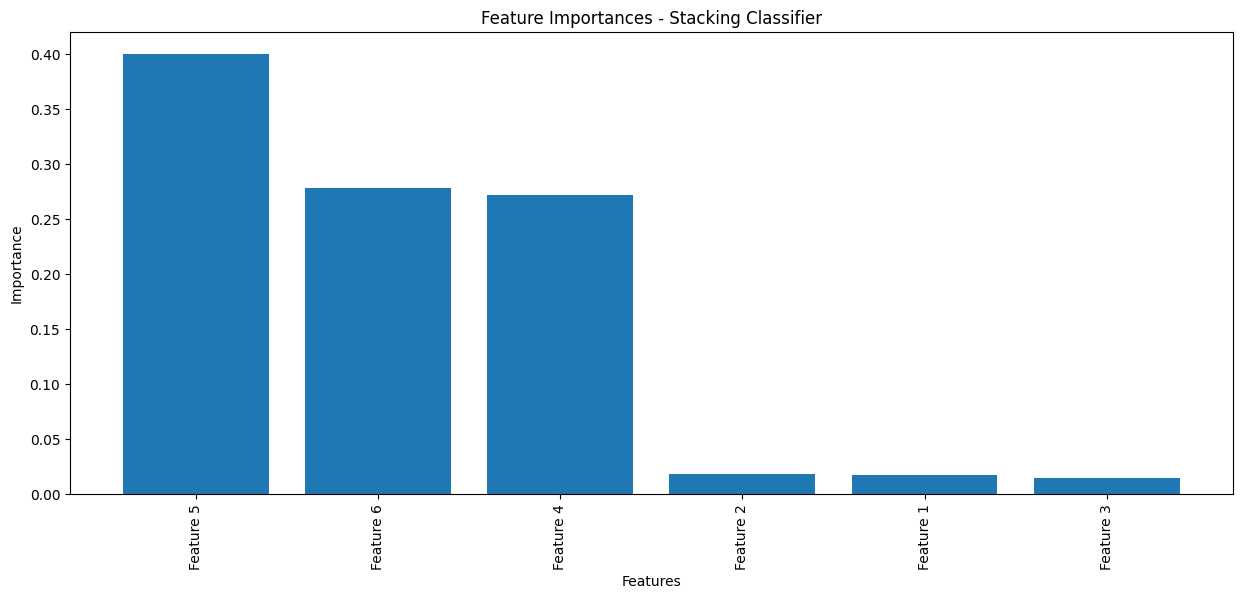

In [19]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Feature Importances for Stacking Classifier
feature_importances_stack = stacking_model.final_estimator_.feature_importances_
feature_names_stack = [f"Feature {i+1}" for i in range(len(feature_importances_stack))]
sorted_idx_stack = feature_importances_stack.argsort()[::-1]

plt.figure(figsize=(15, 6))
plt.bar(range(len(feature_importances_stack)), feature_importances_stack[sorted_idx_stack], align="center")
plt.xticks(range(len(feature_importances_stack)), [feature_names_stack[i] for i in sorted_idx_stack], rotation='vertical')
plt.title("Feature Importances - Stacking Classifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
